<a href="https://colab.research.google.com/github/baitiarecorvalan/MAT281-Entregables/blob/main/docs/codes/labs/lab_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/fralfaro/MAT281/blob/main/docs/labs/lab_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAT281 - Laboratorio N°06


**Objetivo**: Aplicar técnicas básicas de **Machine Learning**, desde la preparación de datos hasta el entrenamiento y evaluación de modelos.




<p align="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ec/Anscombe%27s_quartet_3.svg/1200px-Anscombe%27s_quartet_3.svg.png" width="500"/>
</p>

El **cuarteto de Anscombe** es un ejemplo clásico en estadística que ilustra cómo diferentes conjuntos de datos pueden compartir las mismas propiedades estadísticas, como media, varianza y correlación, pero presentan comportamientos muy distintos cuando se visualizan gráficamente. Cada uno de los cuatro conjuntos consiste en once puntos (x, y) y fue creado por el estadístico F. J. Anscombe en 1973. Esta herramienta resalta la importancia de la visualización de datos para evitar interpretaciones erróneas basadas únicamente en análisis numéricos.

**Descripción del conjunto**

1. **Propiedades estadísticas comunes:** Todos los conjuntos tienen el mismo valor promedio para las variables \(x\) e \(y\), la misma varianza para \(x\) e \(y\), y una correlación lineal idéntica.
2. **Diferencias gráficas:** A pesar de sus similitudes estadísticas, los cuatro conjuntos presentan gráficos muy distintos:
   - El primer conjunto muestra una relación lineal simple.
   - El segundo conjunto tiene una relación no lineal, con una curva clara.
   - El tercer conjunto tiene una relación lineal clara, pero con un punto atípico que influye significativamente.
   - El cuarto conjunto tiene la mayoría de los puntos alineados verticalmente, con un punto atípico que afecta la correlación.

Este cuarteto enfatiza que las estadísticas descriptivas por sí solas pueden no capturar la esencia completa de los datos, subrayando la necesidad de utilizar visualizaciones en cualquier análisis exploratorio de datos.

In [ ]:
# Importar las bibliotecas necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Configuración de los gráficos
%matplotlib inline
sns.set_theme(style="whitegrid")  # Establece un tema general para los gráficos
sns.set_palette("deep", desat=0.6)
plt.rcParams['figure.figsize'] = (12, 8)  # Ajuste del tamaño de las figuras

# Cargar los datos del cuarteto de Anscombe
data = sns.load_dataset("anscombe")

# Mostrar las primeras filas del conjunto de datos
data.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


Con base en la información presentada y el análisis realizado, les invitamos a reflexionar y responder las siguientes preguntas. Estas preguntas están diseñadas para profundizar en su comprensión del cuarteto de Anscombe y fomentar un análisis crítico de los datos:



1. Cree un gráfico de dispersión (scatter plot) para cada uno de los cuatro grupos del cuarteto de Anscombe. A partir de la visualización, ¿puede identificar diferencias significativas entre los grupos? ¿Qué características particulares observa en cada uno que sugieren comportamientos distintos?



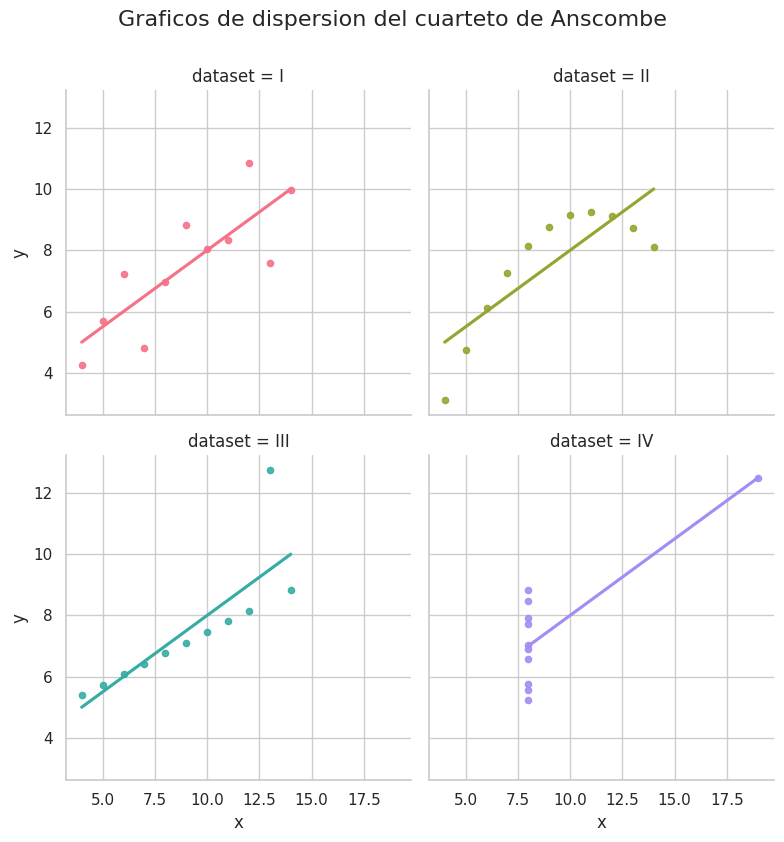

In [ ]:
sns.set_palette(["#DEB6AB"]) #con esto puedo tener graficos de colores bonitos
sns.lmplot(data=data,x="x", y="y",col="dataset",hue="dataset",col_wrap=2,ci=None, height=4,
    scatter_kws={"s":20,"alpha": 0.9}
)
plt.suptitle("Graficos de dispersion del cuarteto de Anscombe", y=1.05, fontsize=16)
plt.show()

__Respuesta__ Claramente, se pueden ver relaciones muy distintas entre cada grupo, mientras el grupo I y III responden a una relacion lineal, el grupo II tiende a ser mas una relacion cuadratica, y por ultimo, el grupo IV tiene la mayoria de puntos en un mismo valor de x con un outliner que permite formar una recta no representativa, a diferencia del grupo III, que a pesar de tener un punto alejado, siguen existiendo más puntos que pueden justificar la recta.

2. Utilice el comando `describe` para generar un resumen de las medidas estadísticas más relevantes para cada uno de los grupos del cuarteto de Anscombe. A partir de estos resultados, interprete las estadísticas obtenidas, destacando las características más significativas de cada grupo y cómo pueden influir en la comprensión de sus respectivas distribuciones.


In [ ]:
data.groupby("dataset")[["x","y"]].describe()


x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

__Respuesta__: La media, en x es 9.0 y En y es aproximadamente 7.50. Para la desviación estándar, en x es 3.316625 y se repite igual en todos los grupos, al igual que en y, que toma un valor de 2.031568. Finalmente, los percentiles parecen tener tambien medidas muy parecidas, en x, los valores van de 4 a 14 en I, II y III pero en el grupo IV se observa un valor máximo de 19, Mientras que en y, el grupo III llega hasta 12.74 y el grupo IV hasta 12.50, mientras que los primeros dos tienen valores de 10.84 y 9.26 respectivamente.

Con lo que podemos concluir que en torno a medias estadisticas, los resultados son bastante similares, mas, en los gráficos se puede notar una gran diferencia en las distribuciones reales de los puntos y la forma en que se relacionan x e y. Por ende, las herramientas visuales siempre son necesarias para un correcto analisis.



3. Ajuste un modelo de regresión lineal para cada grupo utilizando **sklearn**. Calcule las métricas de evaluación, como el error cuadrático medio (MSE) y R², y grafique los resultados de la regresión. Interprete los resultados y su impacto en la calidad del ajuste.



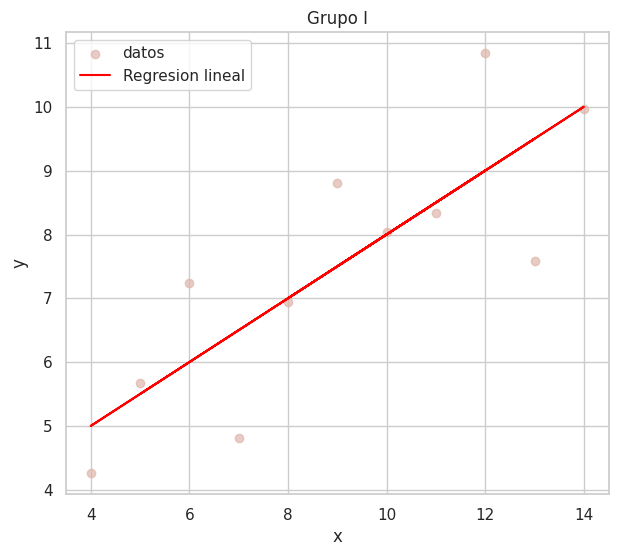

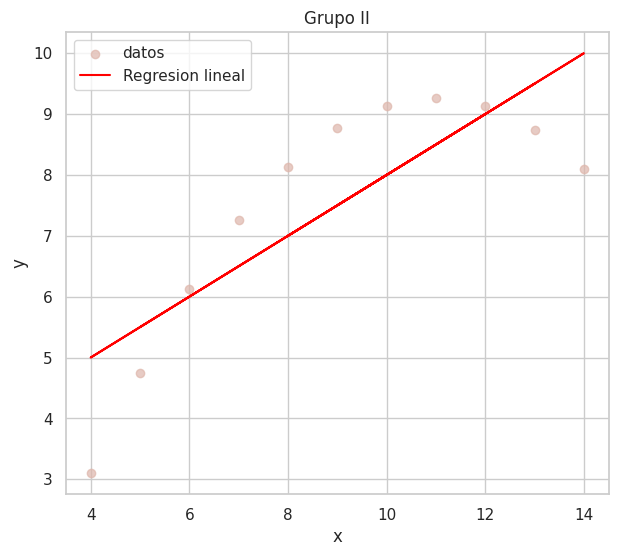

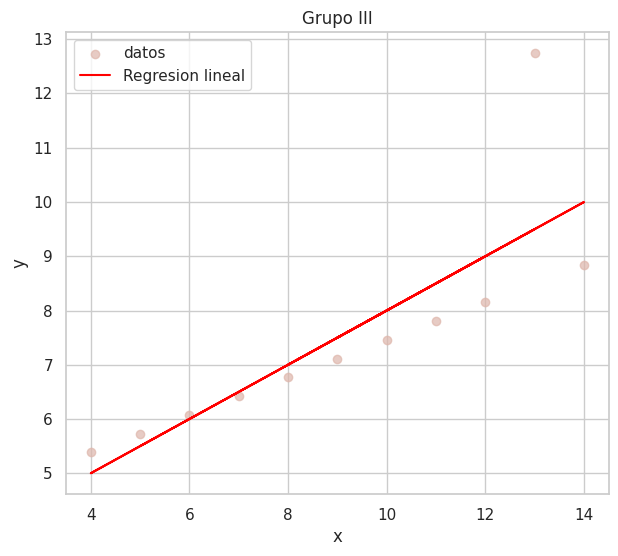

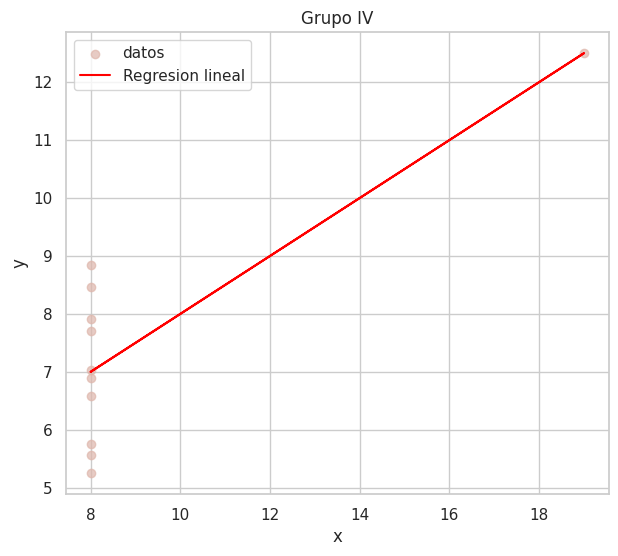

  dataset       MSE        R2
0       I  1.251154  0.666542
1      II  1.252390  0.666242
2     III  1.250563  0.666324
3      IV  1.249317  0.666707


In [ ]:
resultados=[] #hacemos una lista para guardar los datos que se calcularán

for dataset, grupo in data.groupby("dataset"): #para cada grupo en el dataset, hacemos un ajuste, tomamos predicciones, calculamos las metricas y hacemos un grafico#

    x_i=grupo["x"].values.reshape(-1, 1)
    y=grupo["y"].values
    modelo=LinearRegression() #ajustamos el modelo a regresion lineal#
    modelo.fit(x_i, y)
    y_prediccion=modelo.predict(x_i) #obtenemos una prediccion#
    mse=mean_squared_error(y, y_prediccion)#obtenemos MSE#
    r_2=r2_score(y, y_prediccion)           #calculo de R^2#
    resultados.append({"dataset":dataset,"MSE": mse,"R2": r_2})#finalmente añadimos los resultados a la lista para despues poder graficarlos

    plt.figure(figsize=(7, 6))
    plt.scatter(x_i,y,label="datos", alpha=0.7)
    plt.plot(x_i, y_prediccion, color="red", label="Regresion lineal")
    plt.title(f"Grupo {dataset}")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.show()
resultados_df=pd.DataFrame(resultados)
print(resultados_df)

__Respuesta:__ Se tiene que MSE y R2 es muy parecido en todos los grupo, sin embargo, nuevamente los graficos arrojan diferencias muy grandes, lo cual implica que los resultados de MSE y R2 no son absolutamente representativos y podrian llevar a errores importantes si no son revisados visualmente. Ya que en graficos como los del grupo II y IV, las rectas no reflejan nada el comportamiento de los datos, mientras que en III pueden realizarse mejoras.

---



4. Es evidente que el ajuste lineal no es adecuado para algunos grupos. Existen diversas estrategias para abordar este problema, como eliminar outliers o emplear diferentes modelos de regresión. Identifique una estrategia que podría mejorar el ajuste del modelo de regresión lineal y, si lo considera necesario, implemente otros modelos alternativos para aquellos casos donde el ajuste lineal resulte inadecuado.

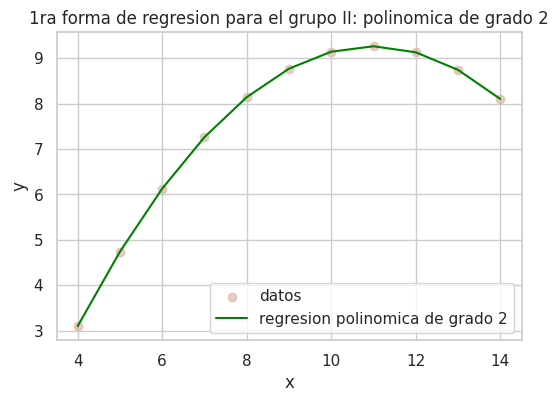

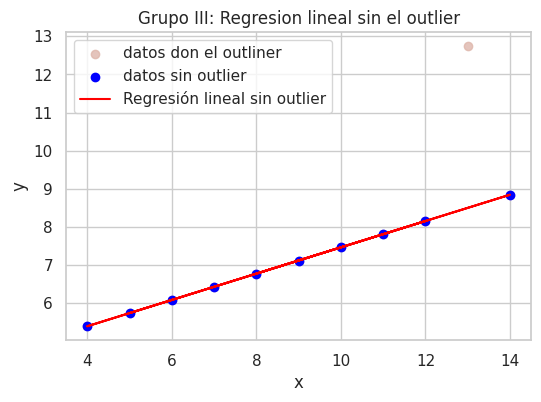

In [ ]:
#los graficos que menos concuerdan son los de los grupos II, III y IV.
# Al grupo II se le podria dar una regresion polinomica de grado dos (cuadratica)
#Al grupo III se le podria quitar el punto alejado
# Y al grupo IV tambien se le podria quitar el punto alejado, pero eso significaria quedarnos solo con muchos puntos en x, lo que seria muy acertivo
#para una regresion lineal

#Para el grupo II seguimos el procedimiento anterior, pero con herramientas de regresion polinomial
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

grupo_II=data[data["dataset"]=="II"]
x_2=grupo_II["x"].values.reshape(-1, 1)
y=grupo_II["y"].values
modelo_p=make_pipeline(PolynomialFeatures(2), LinearRegression()) #armamos el modelo#
modelo_p.fit(x_2, y)
y_pred_poli= modelo_p.predict(x_2) # y las predicciones#

plt.figure(figsize=(6, 4))
plt.scatter(x_2,y,label="datos", alpha=0.7)
plt.plot(np.sort(x_2, axis=0), y_pred_poli[np.argsort(x_2, axis=0).ravel()], color="green", label="regresion polinomica de grado 2")
plt.title("1ra forma de regresion para el grupo II: polinomica de grado 2")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

#Ahora, para el grupo III eliminamos el punto alejado:#

grupo_III=data[data["dataset"] == "III"]
grupo_III_2= grupo_III[grupo_III["x"] != 13] #ya que ese es el outliner
x_3= grupo_III_2["x"].values.reshape(-1, 1)
y=grupo_III_2["y"].values
modelo_III= LinearRegression()
modelo_III.fit(x_3, y)
y_pred_III= modelo_III.predict(x_3)

plt.figure(figsize=(6, 4))
plt.scatter(grupo_III["x"],grupo_III["y"], label="datos don el outliner", alpha=0.8)
plt.scatter(x_3, y, color="blue", label="datos sin outlier")
plt.plot(x_3, y_pred_III, color="red",label="Regresión lineal sin outlier")
plt.title("Grupo III: Regresion lineal sin el outlier")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()


__Respuesta__ Para el grupo I la regresion lineal es correcta, ya que otro tipo de regresion no abarcaria todos lo puntos de forma adecuada, polinomica podria ser, pero creo que esta bien de esa manera ya que las distancias de los datos con la recta tiende a ser igual para cada punto.

Para el grupo II, la regresion lineal no es para nada adecuada, y es necesario hacer ajustes, el ajuste a regresion polinomica de grado 2 es perfecta y queda muy bien ya que estos tienen naturaleza cuadratica.

Para el grupo III, la regresion lineal no es una mala idea ya que va muy bien con la mayoria de los datos, a excepción de uno que se escapa demasiado y hace que la curva sea un poco menos representativa, por lo que se decide eliminarlo y con esto la regresion es 100% acertada.

Finalmente, para el grupo IV, la regresion lineal no es para nada representativa, pero a diferencia de los anteriores, no tiene que ver con el tipo de regresion que se este aplicando, lo que sucede es que pareciera que los datos tienen una relacion constante o no tienen relacion alguna, y ya que la mayoria de puntos que se toman estan una misma columna, no serviria eliminar el dato alejado ya que de lo contrario quedaria una funcion constante en el eje x, con valor 8.